Simple Exponential Smoothing:
    assumes future is similar to the past
    learns 'level' from the demand history

Level: average value around which the demand varies over time

Difference from mean average model:
    the weight assigned to each observation decreases exponentially over time

Model: learn a part of most recent demand + remember a part of last forecast
       learning rate = alpha
       forecast (t) = [alpha*demand(t-1)] + [(1-alpha)*forecast(t-1)]
       recursive as forecast(t-1) depends on demand(t-2) and forecast(t-2) 
       if alpha = high, more reactive, sensitive to outliers and noise
                = low, wont react rapidly, wont overreact to outliers and noise
                  ideal value = 0.05 - 0.5

Future Forecast: same value of the last forecast

Limitations: cannot project trends or seasonality
             cannot use external variables



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm

In [9]:
def simple_exp_smoothing(demand, future_periods = 1, alpha = 0.4):
    columns = len(demand)
    demand = np.append(demand,[np.nan]*future_periods)
    
    forecast = np.full(columns+future_periods,np.nan)
    
    forecast[1] = demand[0] # simple initialization
    
    for t in range(2,columns+1):
        forecast[t] = alpha*demand[t-1] + (1-alpha)*forecast[t-1]
    
    forecast[t+1:] = forecast[t] 
    
    df = pd.DataFrame.from_dict({'Demand':demand,'Forecast':forecast,'Error':demand-forecast})
    return df

In [7]:
def kpi3(df):
    average_demand = df.loc[df['Error'].notnull(),'Demand'].mean()
    print(f"average demand: {average_demand}")
    bias = df['Error'].mean()
    scaled_bias = bias/average_demand
    print('Bias: {:0.2f},{:.2%}'.format(bias,scaled_bias))
    
    MAE = df['Error'].abs().mean()
    scaled_MAE = MAE/average_demand
    print('MAE: {:0.2f}, {:.2%}'.format(MAE,scaled_MAE))
    
    RMSE = np.sqrt((df['Error']**2).mean())
    scaled_RMSE = RMSE/average_demand
    print('RMSE: {:0.2f}, {:.2%}'.format(RMSE,scaled_RMSE))

In [10]:
demand = [28,19,18,13,19,16,19,18,13,16,16,11,18,15,13,15,13,11,13,10,12]
df = simple_exp_smoothing(demand, future_periods=4)

In [11]:
kpi3(df)

average demand: 14.9
Bias: -2.02,-13.56%
MAE: 2.74, 18.39%
RMSE: 3.89, 26.11%


<Axes: title={'center': 'simple exp smoothing'}, xlabel='Period'>

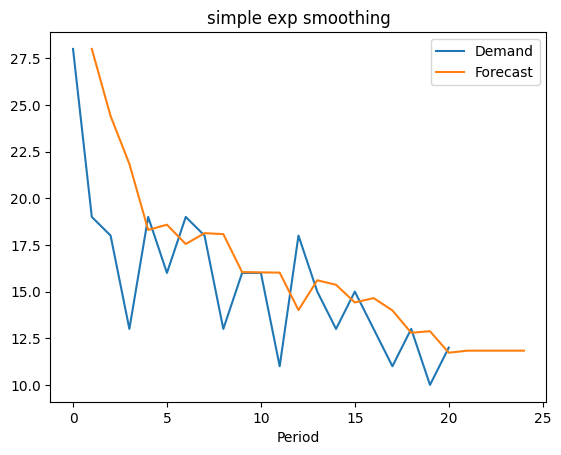

In [12]:
df.index.name = 'Period'
df[['Demand','Forecast']].plot(title = 'simple exp smoothing')